In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import sys
import os
import glob
import shutil

import numpy as np
import matplotlib.pyplot as plt

sys.path.insert(1, './modules/')
import pydelfi_t1.priors as priors
from smt.sampling_methods import LHS

#importing simulation modules and parameters file______
import simulator as sims
data_generation=sims.simulations()
from set_params import *

data_generation=sims.simulations()
#______________________________________________________
    
%matplotlib inline

import tensorflow as tf
print("TensorFlow {}\nnumpy {}".format(
    tf.__version__, np.__version__))

TensorFlow 1.15.0
numpy 1.19.5


In [2]:
checking_data = True

def check_data(data,n_sims=100):
    print(data.shape)
    for j in range (n_obs):
        for i in range (n_sims):
            plt.hist(data[i,100*j:100*(j+1)])
        plt.show()

## Simulating real data samples

In [3]:
n_sets = 2

APPLYING LATIN HYPERCUBE
(2, 300)


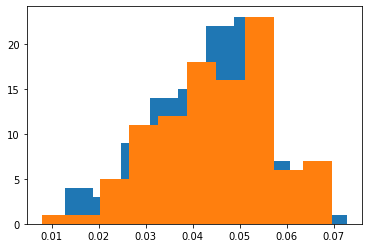

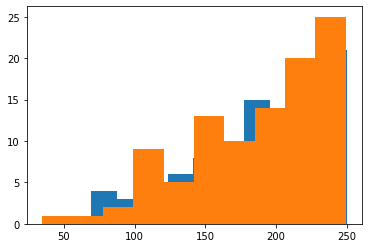

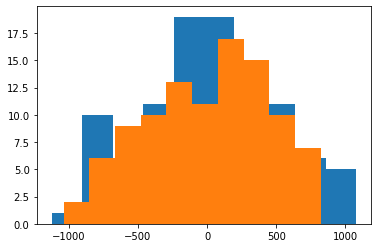

In [4]:
new_realdata = True

if new_realdata == True:
    if not os.path.exists('{}'.format(pathtorealsamples)):
        os.makedirs('{}'.format(pathtorealsamples))
    print('APPLYING LATIN HYPERCUBE')

    sampling = LHS(xlimits=np.array([[65,75],[-0.7,-0.3]]))
    draws = sampling(n_sets)
    
    #print(np.corrcoef(draws[:,0],draws[:,1]))
    #plt.scatter(draws[:,0],draws[:,1])
    #plt.show()
    
    real_data = np.zeros((n_sets,(n_obs)*n_sources))
    
    for i in range (n_sets):
        theta=np.array([draws[i][0],draws[i][1]])
        sim = data_generation.data_simulator(theta = theta)
        real_data[i] = sim

    np.savetxt('{}'.format(pathtorealsamples)+'/multi_thetas{}.txt'.format(ref_filename),draws)    
    np.savetxt('{}'.format(pathtorealsamples)+'/multi_randomdata{}.txt'.format(ref_filename),real_data)
    

if checking_data == True:
    data = np.loadtxt('{}'.format(pathtorealsamples)+'/multi_randomdata{}.txt'.format(ref_filename))
    check_data(data,n_sims=n_sets)

## Simulating training data for the regression neural network

computing training simulations
(5, 1000, 302)
0/1000 thetas done
time for all sims 0:00:01
100/1000 thetas done
time for all sims 0:00:22
200/1000 thetas done
time for all sims 0:00:44
300/1000 thetas done
time for all sims 0:01:05
400/1000 thetas done
time for all sims 0:01:27
500/1000 thetas done
time for all sims 0:01:47
600/1000 thetas done
time for all sims 0:02:09
700/1000 thetas done
time for all sims 0:02:31
800/1000 thetas done
time for all sims 0:02:52
900/1000 thetas done
time for all sims 0:03:14
computing validation simulations
(2, 1000, 302)
0/1000 thetas done
time for all sims 0:00:00
100/1000 thetas done
time for all sims 0:00:09
200/1000 thetas done
time for all sims 0:00:18
300/1000 thetas done
time for all sims 0:00:26
400/1000 thetas done
time for all sims 0:00:34
500/1000 thetas done
time for all sims 0:00:43
600/1000 thetas done
time for all sims 0:00:51
700/1000 thetas done
time for all sims 0:01:00
800/1000 thetas done
time for all sims 0:01:09
900/1000 thetas d

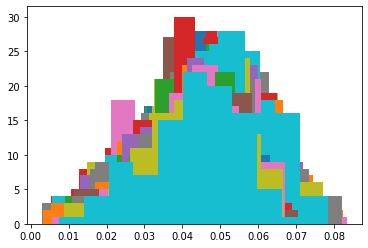

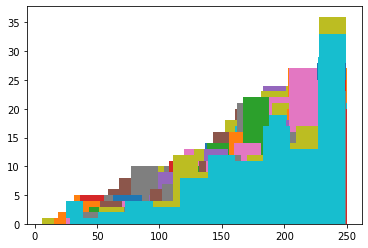

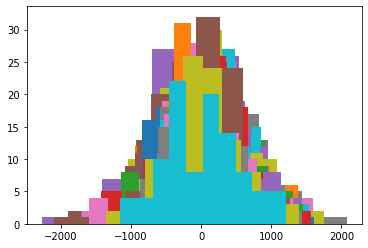

(2000, 302)


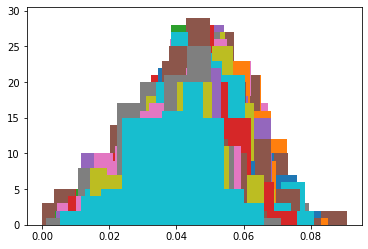

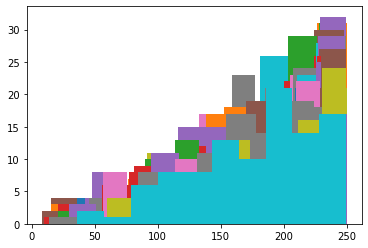

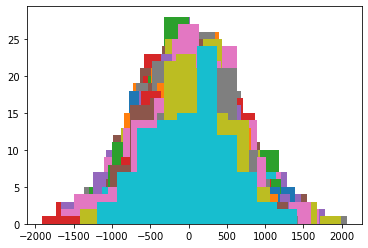

In [5]:
new_NN_data = True

if new_NN_data == True:
    data_generation.NN_datasets()
    
if checking_data == True:
    train_data = np.load('{}'.format(pathtoNNsims)+'training_datasets{}.npy'.format(ref_filename))
    check_data(train_data)
    val_data = np.load('{}'.format(pathtoNNsims)+'validation_datasets{}.npy'.format(ref_filename))
    check_data(val_data)

## Simulating the prerun simulation for LFI computations 

APPLYING UNIFORM PRIOR
(2000, 300)
(2000, 2)
(2000, 300)


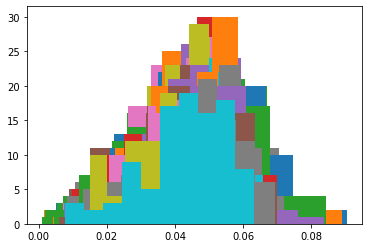

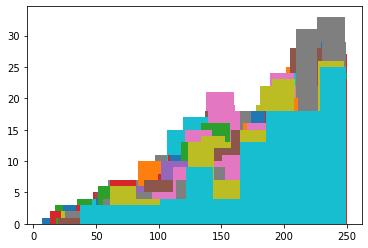

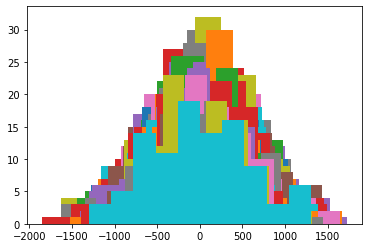

In [6]:
new_prerunsims = True
n_sims = 2000

if new_prerunsims == True:
    
    pathlib.Path('{}'.format(pathtopydelfiprerunsims)).mkdir(parents=True, exist_ok=True)

    # drawing thetas

    print('APPLYING UNIFORM PRIOR')
    prior_distr = priors.Uniform(lower, upper)     

    draws = np.zeros((n_sims,2))
    for i in range (n_sims):
        draws[i]=prior_distr.draw()
    
    np.savetxt('{}'.format(pathtopydelfiprerunsims)+'/prerun_thetas{}.txt'.format(ref_filename),draws) 

    #sims

    prerun_sims = np.zeros((n_sims,(n_obs)*n_sources))
    for i in range (n_sims):
        theta=np.array([draws[i][0],draws[i][1]])
        sim = data_generation.data_simulator(theta = theta)
        prerun_sims[i] = sim  
    
    np.savetxt('{}'.format(pathtopydelfiprerunsims)+'/prerun_sims{}.txt'.format(ref_filename),prerun_sims)

    print(prerun_sims.shape)
    print(draws.shape)
    
if checking_data == True:
    prerun_data = np.loadtxt('{}'.format(pathtopydelfiprerunsims)+'/prerun_sims{}.txt'.format(ref_filename))
    check_data(prerun_data)

## Regression Neural Network 

In [7]:
%cd ./modules/

/share/data1/fgerardi/code_github/example_selection/modules


In [8]:
if sys.version[0]==3:
    pathlib.Path('{}'.format(pathtoNNmodels)).mkdir(parents=True, exist_ok=True) 
else:
    if not os.path.exists('{}'.format(pathtoNNmodels)):
        os.makedirs('{}'.format(pathtoNNmodels))

if MPI_process == True:
    !mpiexec -np 1 python NN.py
else:
    %run NN.py

2021-04-06 18:04:18.778613: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/openmpi/lib
2021-04-06 18:04:18.803389: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/openmpi/lib
____PROCESS0 for [l1,bs,lr]=[array([0.0001]), array([100]), array([0.0001])]have been set____
2021-04-06 18:04:19.402807: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/openmpi/lib
2021-04-06 18:04:19.402843: W external/org_tensor

5000/5000 [==============================] - 0s 28us/sample - loss: 0.4802 - mean_squared_error: 0.0721 - val_loss: 0.5535 - val_mean_squared_error: 0.1456
Epoch 40/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.4774 - mean_squared_error: 0.0698 - val_loss: 0.5510 - val_mean_squared_error: 0.1437
Epoch 41/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.4749 - mean_squared_error: 0.0679 - val_loss: 0.5490 - val_mean_squared_error: 0.1423
Epoch 42/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 0.4727 - mean_squared_error: 0.0663 - val_loss: 0.5466 - val_mean_squared_error: 0.1405
Epoch 43/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.4700 - mean_squared_error: 0.0642 - val_loss: 0.5445 - val_mean_squared_error: 0.1390
Epoch 44/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.4675 - mean_squared_error: 0.0623 - val_loss: 0.5423 - val_mean_squared_err

5000/5000 [==============================] - 0s 28us/sample - loss: 0.3924 - mean_squared_error: 0.0228 - val_loss: 0.4709 - val_mean_squared_error: 0.1019
Epoch 88/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 0.3908 - mean_squared_error: 0.0223 - val_loss: 0.4690 - val_mean_squared_error: 0.1011
Epoch 89/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 0.3894 - mean_squared_error: 0.0220 - val_loss: 0.4676 - val_mean_squared_error: 0.1008
Epoch 90/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.3877 - mean_squared_error: 0.0215 - val_loss: 0.4660 - val_mean_squared_error: 0.1003
Epoch 91/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 0.3865 - mean_squared_error: 0.0214 - val_loss: 0.4648 - val_mean_squared_error: 0.1002
Epoch 92/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 0.3846 - mean_squared_error: 0.0207 - val_loss: 0.4630 - val_mean_squared_err

5000/5000 [==============================] - 0s 29us/sample - loss: 0.3121 - mean_squared_error: 0.0112 - val_loss: 0.3791 - val_mean_squared_error: 0.0792
Epoch 136/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 0.3101 - mean_squared_error: 0.0110 - val_loss: 0.3766 - val_mean_squared_error: 0.0784
Epoch 137/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.3079 - mean_squared_error: 0.0105 - val_loss: 0.3747 - val_mean_squared_error: 0.0782
Epoch 138/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.3060 - mean_squared_error: 0.0104 - val_loss: 0.3730 - val_mean_squared_error: 0.0782
Epoch 139/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.3043 - mean_squared_error: 0.0104 - val_loss: 0.3706 - val_mean_squared_error: 0.0776
Epoch 140/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.3025 - mean_squared_error: 0.0104 - val_loss: 0.3679 - val_mean_square

5000/5000 [==============================] - 0s 29us/sample - loss: 0.2245 - mean_squared_error: 0.0083 - val_loss: 0.2765 - val_mean_squared_error: 0.0612
Epoch 184/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.2227 - mean_squared_error: 0.0082 - val_loss: 0.2745 - val_mean_squared_error: 0.0608
Epoch 185/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.2209 - mean_squared_error: 0.0080 - val_loss: 0.2730 - val_mean_squared_error: 0.0609
Epoch 186/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.2192 - mean_squared_error: 0.0080 - val_loss: 0.2709 - val_mean_squared_error: 0.0604
Epoch 187/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.2179 - mean_squared_error: 0.0082 - val_loss: 0.2689 - val_mean_squared_error: 0.0600
Epoch 188/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.2161 - mean_squared_error: 0.0081 - val_loss: 0.2678 - val_mean_square

5000/5000 [==============================] - 0s 28us/sample - loss: 0.1582 - mean_squared_error: 0.0074 - val_loss: 0.2046 - val_mean_squared_error: 0.0544
Epoch 232/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.1571 - mean_squared_error: 0.0074 - val_loss: 0.2026 - val_mean_squared_error: 0.0535
Epoch 233/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.1558 - mean_squared_error: 0.0072 - val_loss: 0.2016 - val_mean_squared_error: 0.0535
Epoch 234/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.1549 - mean_squared_error: 0.0073 - val_loss: 0.2005 - val_mean_squared_error: 0.0534
Epoch 235/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 0.1537 - mean_squared_error: 0.0071 - val_loss: 0.1997 - val_mean_squared_error: 0.0536
Epoch 236/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.1527 - mean_squared_error: 0.0071 - val_loss: 0.1985 - val_mean_square

5000/5000 [==============================] - 0s 29us/sample - loss: 0.1182 - mean_squared_error: 0.0068 - val_loss: 0.1641 - val_mean_squared_error: 0.0530
Epoch 280/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.1172 - mean_squared_error: 0.0064 - val_loss: 0.1625 - val_mean_squared_error: 0.0520
Epoch 281/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.1167 - mean_squared_error: 0.0065 - val_loss: 0.1631 - val_mean_squared_error: 0.0532
Epoch 282/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.1161 - mean_squared_error: 0.0065 - val_loss: 0.1616 - val_mean_squared_error: 0.0524
Epoch 283/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 0.1151 - mean_squared_error: 0.0061 - val_loss: 0.1613 - val_mean_squared_error: 0.0527
Epoch 284/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.1147 - mean_squared_error: 0.0063 - val_loss: 0.1602 - val_mean_square

5000/5000 [==============================] - 0s 28us/sample - loss: 0.0926 - mean_squared_error: 0.0054 - val_loss: 0.1409 - val_mean_squared_error: 0.0538
Epoch 328/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0923 - mean_squared_error: 0.0054 - val_loss: 0.1399 - val_mean_squared_error: 0.0533
Epoch 329/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 0.0919 - mean_squared_error: 0.0054 - val_loss: 0.1403 - val_mean_squared_error: 0.0540
Epoch 330/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 0.0914 - mean_squared_error: 0.0053 - val_loss: 0.1395 - val_mean_squared_error: 0.0537
Epoch 331/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 0.0913 - mean_squared_error: 0.0056 - val_loss: 0.1393 - val_mean_squared_error: 0.0538
Epoch 332/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 0.0906 - mean_squared_error: 0.0052 - val_loss: 0.1389 - val_mean_square

5000/5000 [==============================] - 0s 28us/sample - loss: 0.0762 - mean_squared_error: 0.0049 - val_loss: 0.1263 - val_mean_squared_error: 0.0551
Epoch 376/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0755 - mean_squared_error: 0.0045 - val_loss: 0.1264 - val_mean_squared_error: 0.0555
Epoch 377/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0755 - mean_squared_error: 0.0047 - val_loss: 0.1262 - val_mean_squared_error: 0.0555
Epoch 378/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 0.0752 - mean_squared_error: 0.0047 - val_loss: 0.1256 - val_mean_squared_error: 0.0552
Epoch 379/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 0.0748 - mean_squared_error: 0.0045 - val_loss: 0.1251 - val_mean_squared_error: 0.0550
Epoch 380/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0746 - mean_squared_error: 0.0047 - val_loss: 0.1249 - val_mean_square

5000/5000 [==============================] - 0s 28us/sample - loss: 0.0638 - mean_squared_error: 0.0037 - val_loss: 0.1165 - val_mean_squared_error: 0.0564
Epoch 424/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0639 - mean_squared_error: 0.0039 - val_loss: 0.1169 - val_mean_squared_error: 0.0570
Epoch 425/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0637 - mean_squared_error: 0.0039 - val_loss: 0.1165 - val_mean_squared_error: 0.0568
Epoch 426/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0634 - mean_squared_error: 0.0039 - val_loss: 0.1158 - val_mean_squared_error: 0.0564
Epoch 427/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0634 - mean_squared_error: 0.0040 - val_loss: 0.1155 - val_mean_squared_error: 0.0562
Epoch 428/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 0.0635 - mean_squared_error: 0.0042 - val_loss: 0.1156 - val_mean_square

5000/5000 [==============================] - 0s 28us/sample - loss: 0.0554 - mean_squared_error: 0.0034 - val_loss: 0.1090 - val_mean_squared_error: 0.0572
Epoch 472/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0552 - mean_squared_error: 0.0035 - val_loss: 0.1096 - val_mean_squared_error: 0.0579
Epoch 473/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0552 - mean_squared_error: 0.0036 - val_loss: 0.1082 - val_mean_squared_error: 0.0566
Epoch 474/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0555 - mean_squared_error: 0.0039 - val_loss: 0.1096 - val_mean_squared_error: 0.0581
Epoch 475/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0556 - mean_squared_error: 0.0042 - val_loss: 0.1085 - val_mean_squared_error: 0.0572
Epoch 476/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0549 - mean_squared_error: 0.0036 - val_loss: 0.1085 - val_mean_square

5000/5000 [==============================] - 0s 29us/sample - loss: 0.0495 - mean_squared_error: 0.0039 - val_loss: 0.1043 - val_mean_squared_error: 0.0588
Epoch 520/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 0.0485 - mean_squared_error: 0.0031 - val_loss: 0.1037 - val_mean_squared_error: 0.0584
Epoch 521/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0483 - mean_squared_error: 0.0030 - val_loss: 0.1030 - val_mean_squared_error: 0.0578
Epoch 522/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 0.0481 - mean_squared_error: 0.0030 - val_loss: 0.1029 - val_mean_squared_error: 0.0579
Epoch 523/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 0.0482 - mean_squared_error: 0.0032 - val_loss: 0.1027 - val_mean_squared_error: 0.0577
Epoch 524/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 0.0485 - mean_squared_error: 0.0036 - val_loss: 0.1037 - val_mean_square

5000/5000 [==============================] - 0s 28us/sample - loss: 0.0433 - mean_squared_error: 0.0028 - val_loss: 0.0990 - val_mean_squared_error: 0.0586
Epoch 568/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0432 - mean_squared_error: 0.0028 - val_loss: 0.0993 - val_mean_squared_error: 0.0590
Epoch 569/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 0.0433 - mean_squared_error: 0.0030 - val_loss: 0.0999 - val_mean_squared_error: 0.0597
Epoch 570/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 0.0429 - mean_squared_error: 0.0027 - val_loss: 0.0996 - val_mean_squared_error: 0.0595
Epoch 571/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 0.0430 - mean_squared_error: 0.0029 - val_loss: 0.0987 - val_mean_squared_error: 0.0586
Epoch 572/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0430 - mean_squared_error: 0.0030 - val_loss: 0.0988 - val_mean_square

5000/5000 [==============================] - 0s 29us/sample - loss: 0.0395 - mean_squared_error: 0.0032 - val_loss: 0.0982 - val_mean_squared_error: 0.0619
Epoch 616/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0394 - mean_squared_error: 0.0031 - val_loss: 0.0967 - val_mean_squared_error: 0.0605
Epoch 617/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 0.0390 - mean_squared_error: 0.0029 - val_loss: 0.0965 - val_mean_squared_error: 0.0604
Epoch 618/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0389 - mean_squared_error: 0.0028 - val_loss: 0.0957 - val_mean_squared_error: 0.0597
Epoch 619/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0386 - mean_squared_error: 0.0026 - val_loss: 0.0966 - val_mean_squared_error: 0.0607
Epoch 620/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 0.0386 - mean_squared_error: 0.0028 - val_loss: 0.0976 - val_mean_square

5000/5000 [==============================] - 0s 28us/sample - loss: 0.0357 - mean_squared_error: 0.0028 - val_loss: 0.0943 - val_mean_squared_error: 0.0614
Epoch 664/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0353 - mean_squared_error: 0.0024 - val_loss: 0.0943 - val_mean_squared_error: 0.0615
Epoch 665/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0353 - mean_squared_error: 0.0025 - val_loss: 0.0939 - val_mean_squared_error: 0.0612
Epoch 666/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0352 - mean_squared_error: 0.0024 - val_loss: 0.0940 - val_mean_squared_error: 0.0613
Epoch 667/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0353 - mean_squared_error: 0.0026 - val_loss: 0.0940 - val_mean_squared_error: 0.0614
Epoch 668/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0351 - mean_squared_error: 0.0025 - val_loss: 0.0936 - val_mean_square

Epoch 711/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0325 - mean_squared_error: 0.0024 - val_loss: 0.0916 - val_mean_squared_error: 0.0615
Epoch 712/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0323 - mean_squared_error: 0.0023 - val_loss: 0.0913 - val_mean_squared_error: 0.0613
Epoch 713/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0323 - mean_squared_error: 0.0023 - val_loss: 0.0923 - val_mean_squared_error: 0.0624
Epoch 714/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0323 - mean_squared_error: 0.0024 - val_loss: 0.0920 - val_mean_squared_error: 0.0621
Epoch 715/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0324 - mean_squared_error: 0.0025 - val_loss: 0.0920 - val_mean_squared_error: 0.0622
Epoch 716/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 0.0330 - mean_squared_error: 0.0031 - val_loss: 0.0915 -

5000/5000 [==============================] - 0s 28us/sample - loss: 0.0307 - mean_squared_error: 0.0028 - val_loss: 0.0897 - val_mean_squared_error: 0.0618
Epoch 759/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0304 - mean_squared_error: 0.0026 - val_loss: 0.0903 - val_mean_squared_error: 0.0625
Epoch 760/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0306 - mean_squared_error: 0.0028 - val_loss: 0.0905 - val_mean_squared_error: 0.0627
Epoch 761/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0307 - mean_squared_error: 0.0029 - val_loss: 0.0892 - val_mean_squared_error: 0.0614
Epoch 762/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0299 - mean_squared_error: 0.0022 - val_loss: 0.0896 - val_mean_squared_error: 0.0619
Epoch 763/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0301 - mean_squared_error: 0.0025 - val_loss: 0.0891 - val_mean_square

5000/5000 [==============================] - 0s 29us/sample - loss: 0.0285 - mean_squared_error: 0.0025 - val_loss: 0.0876 - val_mean_squared_error: 0.0617
Epoch 807/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0283 - mean_squared_error: 0.0024 - val_loss: 0.0880 - val_mean_squared_error: 0.0622
Epoch 808/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0281 - mean_squared_error: 0.0023 - val_loss: 0.0869 - val_mean_squared_error: 0.0611
Epoch 809/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 0.0280 - mean_squared_error: 0.0022 - val_loss: 0.0877 - val_mean_squared_error: 0.0620
Epoch 810/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0284 - mean_squared_error: 0.0026 - val_loss: 0.0878 - val_mean_squared_error: 0.0621
Epoch 811/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0297 - mean_squared_error: 0.0039 - val_loss: 0.0874 - val_mean_square

5000/5000 [==============================] - 0s 29us/sample - loss: 0.0270 - mean_squared_error: 0.0027 - val_loss: 0.0861 - val_mean_squared_error: 0.0618
Epoch 855/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0266 - mean_squared_error: 0.0023 - val_loss: 0.0861 - val_mean_squared_error: 0.0619
Epoch 856/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 0.0263 - mean_squared_error: 0.0021 - val_loss: 0.0856 - val_mean_squared_error: 0.0614
Epoch 857/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0263 - mean_squared_error: 0.0021 - val_loss: 0.0858 - val_mean_squared_error: 0.0617
Epoch 858/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0263 - mean_squared_error: 0.0022 - val_loss: 0.0853 - val_mean_squared_error: 0.0611
Epoch 859/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0271 - mean_squared_error: 0.0029 - val_loss: 0.0866 - val_mean_square

5000/5000 [==============================] - 0s 28us/sample - loss: 0.0259 - mean_squared_error: 0.0029 - val_loss: 0.0850 - val_mean_squared_error: 0.0621
Epoch 903/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0253 - mean_squared_error: 0.0024 - val_loss: 0.0844 - val_mean_squared_error: 0.0615
Epoch 904/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0254 - mean_squared_error: 0.0026 - val_loss: 0.0846 - val_mean_squared_error: 0.0617
Epoch 905/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 0.0256 - mean_squared_error: 0.0028 - val_loss: 0.0851 - val_mean_squared_error: 0.0623
Epoch 906/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0255 - mean_squared_error: 0.0026 - val_loss: 0.0851 - val_mean_squared_error: 0.0623
Epoch 907/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0250 - mean_squared_error: 0.0023 - val_loss: 0.0847 - val_mean_square

5000/5000 [==============================] - 0s 28us/sample - loss: 0.0240 - mean_squared_error: 0.0023 - val_loss: 0.0832 - val_mean_squared_error: 0.0616
Epoch 951/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0238 - mean_squared_error: 0.0022 - val_loss: 0.0833 - val_mean_squared_error: 0.0617
Epoch 952/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 0.0236 - mean_squared_error: 0.0021 - val_loss: 0.0828 - val_mean_squared_error: 0.0613
Epoch 953/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0239 - mean_squared_error: 0.0024 - val_loss: 0.0842 - val_mean_squared_error: 0.0626
Epoch 954/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0241 - mean_squared_error: 0.0026 - val_loss: 0.0824 - val_mean_squared_error: 0.0608
Epoch 955/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0239 - mean_squared_error: 0.0024 - val_loss: 0.0839 - val_mean_square

5000/5000 [==============================] - 0s 29us/sample - loss: 0.0230 - mean_squared_error: 0.0025 - val_loss: 0.0826 - val_mean_squared_error: 0.0621
Epoch 999/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 0.0226 - mean_squared_error: 0.0021 - val_loss: 0.0823 - val_mean_squared_error: 0.0618
Epoch 1000/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 0.0230 - mean_squared_error: 0.0026 - val_loss: 0.0814 - val_mean_squared_error: 0.0609
Epoch 1001/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0228 - mean_squared_error: 0.0024 - val_loss: 0.0828 - val_mean_squared_error: 0.0623
Epoch 1002/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0227 - mean_squared_error: 0.0023 - val_loss: 0.0820 - val_mean_squared_error: 0.0616
Epoch 1003/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0226 - mean_squared_error: 0.0022 - val_loss: 0.0816 - val_mean_sq

5000/5000 [==============================] - 0s 29us/sample - loss: 0.0221 - mean_squared_error: 0.0025 - val_loss: 0.0812 - val_mean_squared_error: 0.0616
Epoch 1046/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0214 - mean_squared_error: 0.0019 - val_loss: 0.0810 - val_mean_squared_error: 0.0615
Epoch 1047/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0215 - mean_squared_error: 0.0020 - val_loss: 0.0808 - val_mean_squared_error: 0.0613
Epoch 1048/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0217 - mean_squared_error: 0.0022 - val_loss: 0.0823 - val_mean_squared_error: 0.0628
Epoch 1049/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 0.0217 - mean_squared_error: 0.0022 - val_loss: 0.0813 - val_mean_squared_error: 0.0619
Epoch 1050/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0220 - mean_squared_error: 0.0025 - val_loss: 0.0824 - val_mean_s

5000/5000 [==============================] - 0s 28us/sample - loss: 0.0209 - mean_squared_error: 0.0022 - val_loss: 0.0813 - val_mean_squared_error: 0.0626
Epoch 1093/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0212 - mean_squared_error: 0.0025 - val_loss: 0.0807 - val_mean_squared_error: 0.0620
Epoch 1094/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0214 - mean_squared_error: 0.0027 - val_loss: 0.0805 - val_mean_squared_error: 0.0618
Epoch 1095/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0215 - mean_squared_error: 0.0028 - val_loss: 0.0806 - val_mean_squared_error: 0.0619
Epoch 1096/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0222 - mean_squared_error: 0.0034 - val_loss: 0.0805 - val_mean_squared_error: 0.0617
Epoch 1097/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0213 - mean_squared_error: 0.0026 - val_loss: 0.0805 - val_mean_s

5000/5000 [==============================] - 0s 29us/sample - loss: 0.0206 - mean_squared_error: 0.0026 - val_loss: 0.0787 - val_mean_squared_error: 0.0607
Epoch 1140/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 0.0204 - mean_squared_error: 0.0025 - val_loss: 0.0798 - val_mean_squared_error: 0.0618
Epoch 1141/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 0.0203 - mean_squared_error: 0.0023 - val_loss: 0.0788 - val_mean_squared_error: 0.0609
Epoch 1142/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0199 - mean_squared_error: 0.0020 - val_loss: 0.0799 - val_mean_squared_error: 0.0620
Epoch 1143/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 0.0198 - mean_squared_error: 0.0019 - val_loss: 0.0796 - val_mean_squared_error: 0.0617
Epoch 1144/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0198 - mean_squared_error: 0.0020 - val_loss: 0.0796 - val_mean_s

5000/5000 [==============================] - 0s 28us/sample - loss: 0.0196 - mean_squared_error: 0.0023 - val_loss: 0.0788 - val_mean_squared_error: 0.0615
Epoch 1187/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0193 - mean_squared_error: 0.0021 - val_loss: 0.0790 - val_mean_squared_error: 0.0618
Epoch 1188/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0196 - mean_squared_error: 0.0023 - val_loss: 0.0795 - val_mean_squared_error: 0.0622
Epoch 1189/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0193 - mean_squared_error: 0.0021 - val_loss: 0.0801 - val_mean_squared_error: 0.0629
Epoch 1190/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0191 - mean_squared_error: 0.0019 - val_loss: 0.0790 - val_mean_squared_error: 0.0619
Epoch 1191/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0194 - mean_squared_error: 0.0023 - val_loss: 0.0796 - val_mean_s

5000/5000 [==============================] - 0s 28us/sample - loss: 0.0186 - mean_squared_error: 0.0020 - val_loss: 0.0783 - val_mean_squared_error: 0.0617
Epoch 1234/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 0.0188 - mean_squared_error: 0.0022 - val_loss: 0.0790 - val_mean_squared_error: 0.0624
Epoch 1235/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0188 - mean_squared_error: 0.0023 - val_loss: 0.0788 - val_mean_squared_error: 0.0623
Epoch 1236/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0192 - mean_squared_error: 0.0026 - val_loss: 0.0781 - val_mean_squared_error: 0.0615
Epoch 1237/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 0.0190 - mean_squared_error: 0.0024 - val_loss: 0.0778 - val_mean_squared_error: 0.0613
Epoch 1238/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0187 - mean_squared_error: 0.0022 - val_loss: 0.0790 - val_mean_s

5000/5000 [==============================] - 0s 29us/sample - loss: 0.0184 - mean_squared_error: 0.0024 - val_loss: 0.0774 - val_mean_squared_error: 0.0614
Epoch 1281/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 0.0185 - mean_squared_error: 0.0025 - val_loss: 0.0770 - val_mean_squared_error: 0.0610
Epoch 1282/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0183 - mean_squared_error: 0.0023 - val_loss: 0.0791 - val_mean_squared_error: 0.0631
Epoch 1283/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0182 - mean_squared_error: 0.0022 - val_loss: 0.0779 - val_mean_squared_error: 0.0619
Epoch 1284/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 0.0178 - mean_squared_error: 0.0019 - val_loss: 0.0777 - val_mean_squared_error: 0.0618
Epoch 1285/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 0.0178 - mean_squared_error: 0.0018 - val_loss: 0.0784 - val_mean_s

5000/5000 [==============================] - 0s 37us/sample - loss: 0.0177 - mean_squared_error: 0.0022 - val_loss: 0.0783 - val_mean_squared_error: 0.0628
Epoch 01327: early stopping


## STAN

In [ ]:
%cd ./modules/

In [ ]:
for k in range (1):
    np.save('real_data_element',k)
    %run STAN.py
os.remove("real_data_element.npy")

## Likelihood free inference

In [9]:
%cd ./modules/

[Errno 2] No such file or directory: './modules/'
/share/data1/fgerardi/code_github/example_selection/modules


In [10]:
if sys.version[0]==3:
    pathlib.Path('{}'.format(pathtoLFIresults)).mkdir(parents=True, exist_ok=True) 
else:
    if not os.path.exists('{}'.format(pathtoLFIresults)):
        os.makedirs('{}'.format(pathtoLFIresults))

In [11]:
all_real_data = True
if all_real_data == True:
    for k in range (1):
        np.save('real_data_element',k)
        if MPI_process == True:
            !mpiexec -np 1 python LFI.py
        else:
            %run LFI.py
        dest = '../LFI_results/results_pydelfi_{}'.format(k)
        if os.path.isdir(dest) == True:
            for file in glob.glob('../results_pydelfi/*'):
                shutil.move(file, dest)
        else:
            os.rename('../results_pydelfi',dest)
    os.remove('real_data_element.npy')
else:
    if MPI_process == True:
        !mpiexec -np 1 python LFI.py
    else:
        %run LFI.py

2021-04-06 18:08:51.298647: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/openmpi/lib
2021-04-06 18:08:51.320295: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/openmpi/lib
1
2021-04-06 18:08:51.898413: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/openmpi/lib
2021-04-06 18:08:51.898448: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: UNKNOWN ERROR (303)
____PROCESS0 for NN_filename=MSE_ns5000_

Training:  17%|█▋        | 86/500 [01:00<04:45,  1.45it/s, train loss=0.848, val loss=0.936]


Training:  30%|███       | 151/500 [01:13<00:52,  6.68it/s, train loss=0.798, val loss=0.863]


Training:  44%|████▍     | 219/500 [01:25<00:46,  6.09it/s, train loss=0.784, val loss=0.85] 


Training:  53%|█████▎    | 263/500 [01:27<00:12, 19.72it/s, train loss=0.782, val loss=0.856]

Training:   0%|          | 0/500 [00:00<?, ?it/s]

Training:   0%|          | 0/500 [00:00<?, ?it/s, train loss=0, val loss=0]

Training:   0%|          | 1/500 [00:00<06:21,  1.31it/s, train loss=0, val loss=0]

Training:   0%|          | 1/500 [00:00<06:21,  1.31it/s, train loss=2.85, val loss=2.93]

Training:   0%|          | 2/500 [00:01<08:38,  1.04s/it, train loss=2.85, val loss=2.93]

Training:   0%|          | 2/500 [00:02<08:38,  1.04s/it, train loss=2.45, val loss=2.48]

Training:   1%|          | 3/500 [00:02<08:07,  1.02it/s, train loss=2.45, val loss=2.48]

Training:   1%|          | 3/500 [00:02<08:07,  1.02it/s, train loss=2.12, val loss=2.14]

Training:   1%|          | 4/500 [00:03<07:47,  1.06it/s, train loss=2.12, val loss=2.14]

Training:   1%|          | 4/500 [00:03<07:47,  1.06it/s, train loss=1.85, val loss=1.87]

Training:   1%|          | 5/500 [00:04<07:33,  1.09it/

Training:   3%|▎         | 16/500 [00:14<07:06,  1.14it/s, train loss=1.19, val loss=1.14]

Training:   3%|▎         | 17/500 [00:15<07:07,  1.13it/s, train loss=1.19, val loss=1.14]

Training:   3%|▎         | 17/500 [00:15<07:07,  1.13it/s, train loss=1.17, val loss=1.13]

Training:   4%|▎         | 18/500 [00:16<07:03,  1.14it/s, train loss=1.17, val loss=1.13]

Training:   4%|▎         | 18/500 [00:16<07:03,  1.14it/s, train loss=1.16, val loss=1.13]

Training:   4%|▍         | 19/500 [00:16<07:01,  1.14it/s, train loss=1.16, val loss=1.13]

Training:  53%|█████▎    | 263/500 [01:45<00:12, 19.72it/s, train loss=0.782, val loss=0.856]

Training:   4%|▍         | 20/500 [00:17<07:00,  1.14it/s, train loss=1.13, val loss=1.08]

Training:   4%|▍         | 20/500 [00:17<07:00,  1.14it/s, train loss=1.11, val loss=1.08]

Training:   4%|▍         | 21/500 [00:18<06:57,  1.15it/s, train loss=1.11, val loss=1.08]

Training:   4%|▍         | 21/500 [00:18<06:57,  1.15it/s, train loss=1.1, va

Training:  13%|█▎        | 67/500 [00:41<03:18,  2.18it/s, train loss=0.864, val loss=0.815]

Training:  14%|█▎        | 68/500 [00:41<03:17,  2.18it/s, train loss=0.862, val loss=0.83] 

Training:  14%|█▍        | 69/500 [00:41<03:17,  2.18it/s, train loss=0.859, val loss=0.81]

Training:  14%|█▍        | 70/500 [00:41<03:17,  2.18it/s, train loss=0.857, val loss=0.81]

Training:  14%|█▍        | 71/500 [00:41<01:49,  3.91it/s, train loss=0.857, val loss=0.81]

Training:  14%|█▍        | 71/500 [00:41<01:49,  3.91it/s, train loss=0.855, val loss=0.822]

Training:  14%|█▍        | 72/500 [00:41<01:49,  3.91it/s, train loss=0.853, val loss=0.817]

Training:  15%|█▍        | 73/500 [00:41<01:49,  3.91it/s, train loss=0.856, val loss=0.836]

Training:  15%|█▍        | 74/500 [00:41<01:48,  3.91it/s, train loss=0.852, val loss=0.795]

Training:  15%|█▌        | 75/500 [00:42<01:45,  4.02it/s, train loss=0.852, val loss=0.795]

Training:  15%|█▌        | 75/500 [00:42<01:45,  4.02it/s, trai

Training:  10%|▉         | 49/500 [00:19<00:41, 10.86it/s, train loss=0.774, val loss=0.879]


Training:  12%|█▏        | 58/500 [00:19<00:29, 14.87it/s, train loss=0.814, val loss=0.988]____PROCESS0 for NN_filename=[array([0.0001]), array([100]), array([0.0001])]has finished training pydelfi____

Training:  12%|█▏        | 58/500 [08:32<1:05:02,  8.83s/it, train loss=0.814, val loss=0.988]Figure(1200x1200)
Removed no burn in
Removed no burn in
____PROCESS0 for NN_filename=[array([0.0001]), array([100]), array([0.0001])]has finished____

./pydelfi_t1/delfi.py:632: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xtl, rotation=45)
Training:  25%|██▌       | 125/500 [09:20<28:01,  4.48s/it, train loss=0.784, val loss=0.919]